### ------------------------------------------------------------------------
### Aula Inteligência Artificial
### Pré-processamento dos dados
### Algoritmos:  Randon Forest e SVM
### -------------------------------------------------------------------------

### Stroke Prediction Dataset - Acidente Vascular Cerebral
* https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

*  Stroke is a medical emergency. A stroke occurs when blood flow to a part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die within minutes 

* Age: People aged 55 years and over

* Hypertension: if the systolic pressure is 140 mm Hg or more, or the diastolic pressure is 90 mm Hg or more

* Hypercholesterolemia: If the cholesterol level in the blood is 200 milligrams per deciliter

* Smoking

* Diabetes

* Obesity: if the body mass index (BMI) is 30 or more



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

## Resumo geral da base de dados

In [ ]:
print ("Linhas: " , df.shape[0])
print ("Colunas: " , df.shape[1])
print ("\nAtributos : \n" , df.columns.tolist())
print ("\nValores faltantes :  ", df.isnull().sum().values.sum())
print ("\nValores únicos :  \n",df.nunique())

Linhas:  5110
Colunas:  12

Atributos : 
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Valores faltantes :   201

Valores únicos :  
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


<h1 style="font-family:Georgia;font-size:175%;text-align:center">Data Visualization</h1>


<h1 style="font-family:Georgia;font-size:175%;text-align:left">Heatmap Correlation</h1>

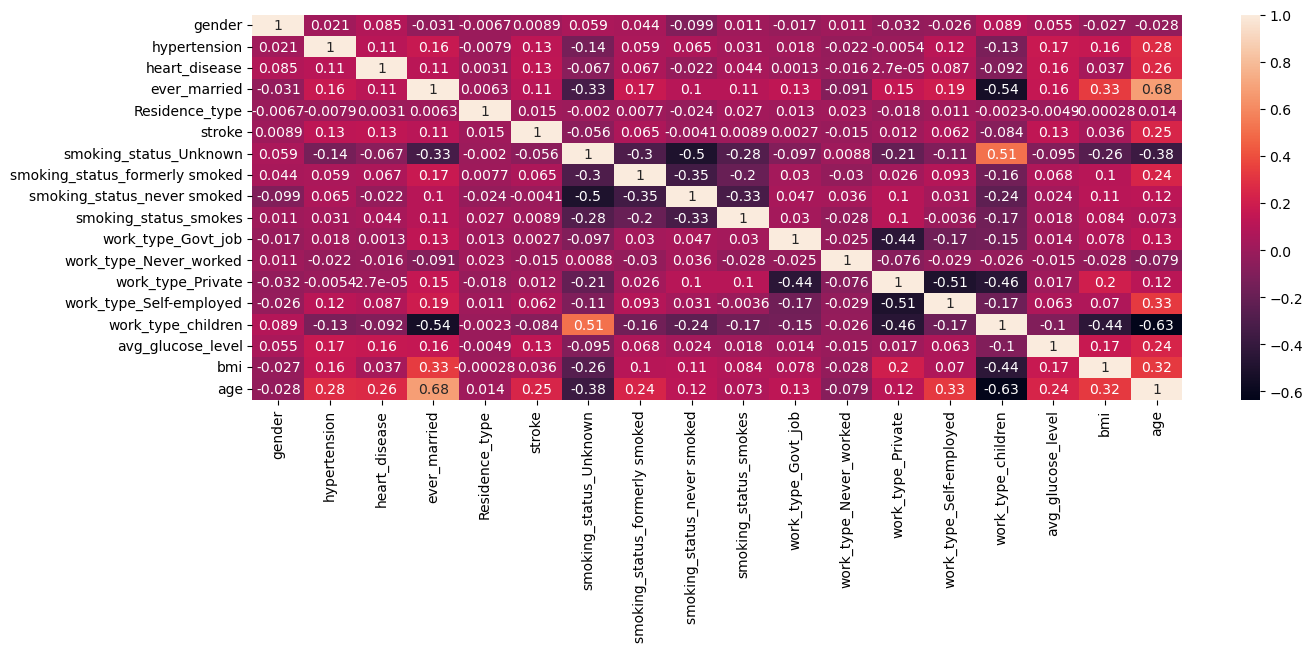

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True);

## Pré-processamento

### Remoção ID feature e verificação de dados faltantes

In [ ]:
df=df.drop(columns='id',axis=1)

In [ ]:
df[df.isnull().any(axis=1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
# ### Substituição NAs BMI pela mediana
# mediana = sts.median(df['bmi'])
# #preenche NAs
# df['bmi'].fillna(mediana, inplace=True)

In [ ]:
## Outra opção a partir do SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
 
df['bmi'] = imputer.fit_transform(df['bmi'].values.reshape(-1,1))[:,0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Encoding Categorical Features
* https://www.kaggle.com/code/alexisbcook/categorical-variables/tutorial
* https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

* Atributos com apenas dois valores

In [ ]:
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

* Opção com LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df[["Residence_type","ever_married", "gender"]] = \
df[["Residence_type","ever_married", "gender"]].apply(labelencoder.fit_transform)

* Atributos com mais de dois valores

In [ ]:
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.1,1,0,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.1,0,0,0,1,0,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,0,0,1,0,0


### Normalização dos dados

https://pt.linkedin.com/pulse/padroniza%C3%A7%C3%A3o-vs-normaliza%C3%A7%C3%A3o-jose-r-f-junior?trk=pulse-article

A normalização por reescala define, através de um valor mínimo e um valor máximo, um novo intervalo onde os valores de um atributo estarão contidos. Tipicamente, tal intervalo é definido como [0, 1]. Portanto, para este caso, a normalização por reescala de um atributo $j$ de um objeto $x_i$ pode ser calculada como:

$$ x_{ij} = \frac{x_{ij} - min_j}{max_j - min_j} $$

sendo min_j e max_j , nessa ordem, os valores mínimo e máximo do atributo $j$ para o conjunto de dados considerado.

Na normalização por padronização, os diferentes atributos contínuos poderão abranger diferentes intervalos, mas deverão possuir os mesmos valores para alguma medida de posição e de espalhamento/variação. 
Essas medidas irão consistir na média e no desvio-padrão. Neste caso, o valor normalizado de um atributo $j$
em um objeto $i$ é dado por:

$$ x_{ij} = \frac{x_{ij} - \bar{x}_j}{\sigma_j} $$

In [ ]:
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [ ]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,2.706375,1.005086,1.051434
1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,2.121559,-0.098981,0.786070
2,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,-0.005028,0.472536,1.626390
3,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1.437358,0.719327,0.255342
4,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1.501184,-0.631531,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,-0.494658,-0.098981,1.626390
5106,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0.420775,1.446713,1.670617
5107,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.511443,0.225745,-0.363842
5108,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1.328257,-0.423706,0.343796


## 3) Algoritmos de Classificação
* Randon Forest
* SVM

### Separação entre treino e teste (70% e 30%)

In [ ]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<h1 style="font-family:Georgia;font-size:175%;text-align:left">SVM </h1>

In [ ]:

svc = SVC(random_state=0)
svc.fit(X_train, y_train)
#== 
#Score 
#== 
svc_score = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = svc.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(cm)

Training Score 0.9513558848196813
Testing Score 
 0.9510763209393346
[[1458    0]
 [  75    0]]


<h1 style="font-family:Georgia;font-size:175%;text-align:left">Random Forest Classifier</h1>

In [ ]:
forest = RandomForestClassifier(n_estimators = 100)
#== 
forest.fit(X_train, y_train)
#== 
#Score 
#== 
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = forest.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 1.0
Testing Score 
 0.9484670580560991
[[1453    5]
 [  74    1]]


### Exemplo com validação cruzada

- https://drigols.medium.com/introdu%C3%A7%C3%A3o-a-valida%C3%A7%C3%A3o-cruzada-k-fold-2a6bced32a90
- https://dataml.com.br/validacao-cruzada-aninhada-com-scikit-learn/
- Classificador: Rondon Forest

<div>
<img src="cross_validation.png" width="600"/>
</div>

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    forest.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(forest.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.9471624266144814, 0.9471624266144814, 0.949119373776908, 0.9471624266144814, 0.9510763209393346, 0.9510763209393346, 0.9471624266144814, 0.949119373776908, 0.9471624266144814, 0.9530332681017613]

Maior ACC: 95.30332681017613 %

Menor ACC: 94.71624266144813 %

Média ACC: 94.89236790606654 %

Desvio Padrão: 0.002153630009030564


### Exemplo de balanceamento das classes
- https://medium.com/analytics-vidhya/undersampling-and-oversampling-an-old-and-a-new-approach-4f984a0e8392
* Abordagem SMOTE e Randon Forest

<div>
<img src="Random-a-over-sampling-b-under-sampling.png" width="600"/>
</div>

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    sm = SMOTE()
    x_train_oversampled, y_train_oversampled = sm.fit_resample(x_train_fold, y_train_fold)
    forest.fit(x_train_oversampled, y_train_oversampled)
    lst_accu_stratified.append(forest.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.9217221135029354, 0.9256360078277887, 0.9275929549902152, 0.913894324853229, 0.8962818003913894, 0.9354207436399217, 0.913894324853229, 0.9295499021526419, 0.9178082191780822, 0.9099804305283757]

Maior ACC: 93.54207436399217 %

Menor ACC: 89.62818003913894 %

Média ACC: 91.91780821917807 %

Desvio Padrão: 0.011337915287366962
